In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [31]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: .DS_Store
  File: .gitattributes
  File: my_first_submission.csv
  File: Readme.md
  File: read_files.ipynb
  File: sample_submission.csv
  File: test.csv
Directory: .\.git
  File: COMMIT_EDITMSG
  File: config
  File: description
  File: FETCH_HEAD
  File: HEAD
  File: index
Directory: .\.git\hooks
  File: applypatch-msg.sample
  File: commit-msg.sample
  File: fsmonitor-watchman.sample
  File: post-update.sample
  File: pre-applypatch.sample
  File: pre-commit.sample
  File: pre-merge-commit.sample
  File: pre-push.sample
  File: pre-rebase.sample
  File: pre-receive.sample
  File: prepare-commit-msg.sample
  File: push-to-checkout.sample
  File: update.sample
Directory: .\.git\info
  File: exclude
Directory: .\.git\logs
  File: HEAD
Directory: .\.git\logs\refs
Directory: .\.git\logs\refs\heads
  File: main
Directory: .\.git\logs\refs\remotes
Directory: .\.git\logs\refs\remotes\origin
  File: HEAD
  File: main
Directory: .\.git\objects
Directory: .\.git\objects\0

In [32]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [33]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')


In [34]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')


In [35]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')


<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

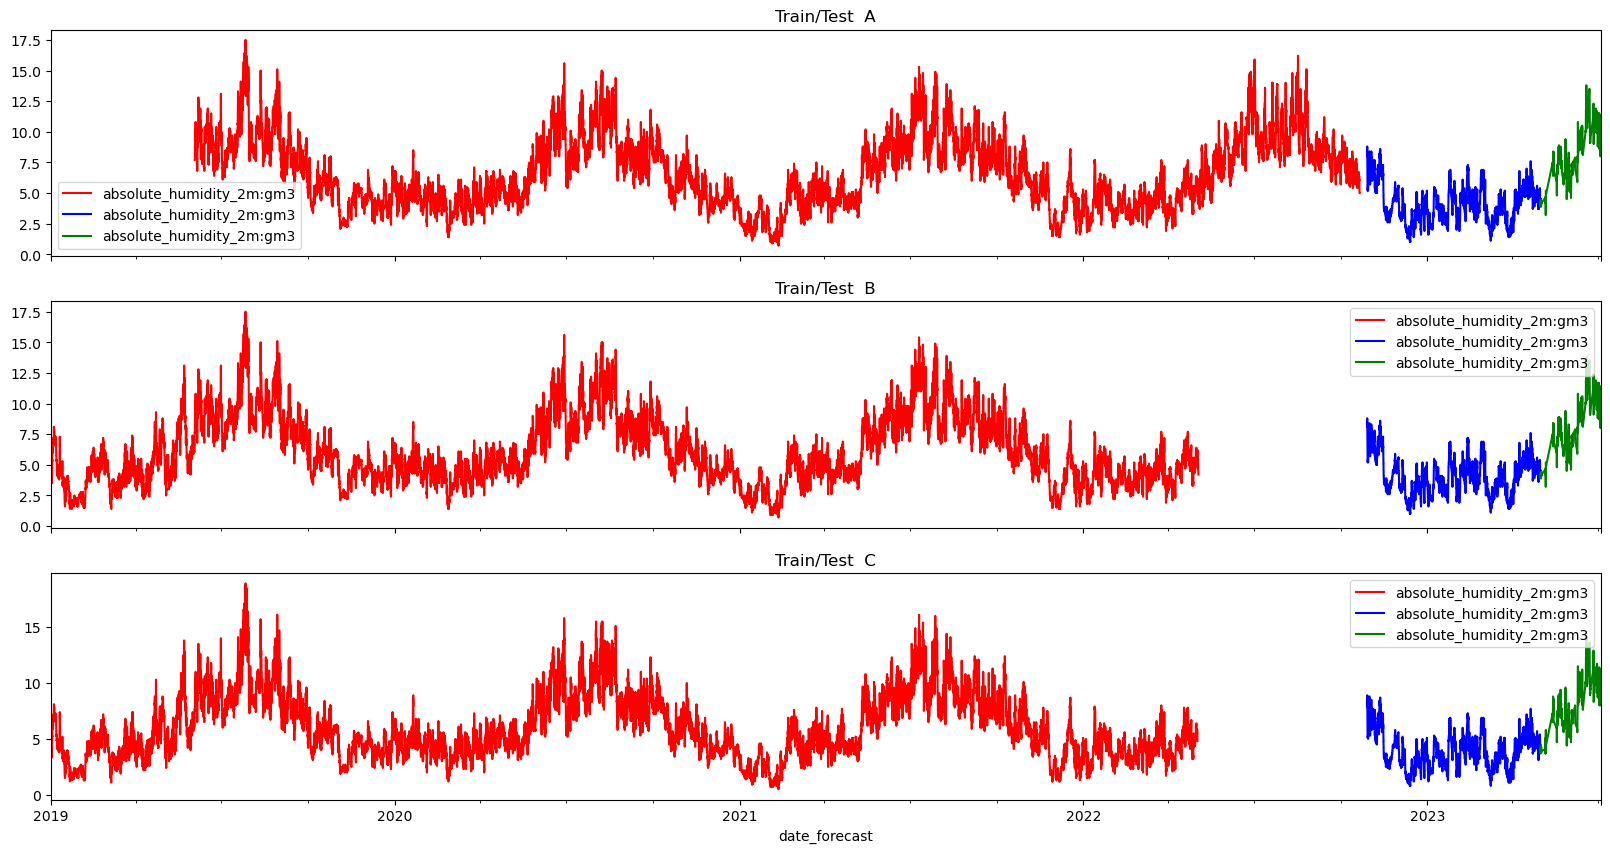

In [36]:
# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

In [37]:
test = pd.read_csv('test.csv')
test


,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [38]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [39]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

# A faire 

## Partie I : 
- Comparer les lignes
- Voir le lignes vides 
- Grouper les varaibles et les comprendre !!! 

## Partie II :
- Regarder les liens entre les variables (matrice de covariance)
- Etude des variables quantitatives
- Etude des variables qualitatives

## Partie III : 
- Voir si besoin de transformer des varaibles (nom ou autre)
- Se renseigner sur les modèles liées aux times series



In [40]:
# Décrire les données
X_train_observed_a.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,118669.000000,118669.000000,96422.000000,1.186690e+05,118669.000000,110603.000000,118669.000000,118669.000000,118669.000000,1.186690e+05,118669.000000,1.186690e+05,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,2724.0,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000
mean,6.652576,1.249064,2907.949219,5.994018e+05,166.500381,1737.142212,0.022398,276.823395,44.918282,1.617057e+05,56.611744,2.038025e+05,67.605507,6.0,0.053117,0.004418,0.106243,0.013277,0.026567,0.521391,0.511650,1009.632996,0.006302,0.091018,996.765381,1002.868225,0.187399,0.011914,74.231705,1008.998352,250.0,0.052763,0.0,0.000062,0.091566,179.629486,1.529545,0.059087,280.708557,74.401077,32446.992188,3.043197,0.756781,0.517437,0.000019
std,2.796409,0.036317,2570.401855,8.797980e+05,244.907578,1815.570679,0.190339,6.701851,64.780273,2.301814e+05,119.745392,4.248438e+05,33.857571,0.0,0.489839,0.075659,0.746422,0.181746,0.306437,0.499342,0.499748,12.484639,0.037381,0.379524,12.351003,12.404640,2.519959,0.047560,13.889423,12.460940,0.0,0.409022,0.0,0.001884,0.249243,103.778503,24.146574,0.109520,6.573745,33.518063,17967.917969,1.779309,2.856045,1.851810,0.001392
min,0.700000,1.145000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,250.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,932.299988,938.099976,0.000000,0.000000,22.700001,943.900024,250.0,0.000000,0.0,-0.000000,0.000000,0.002000,-50.004002,0.000000,258.899994,0.000000,154.300003,0.000000,-7.300000,-9.300000,-0.000000
25%,4.400000,1.224000,1102.900024,0.000000e+00,0.000000,590.700012,0.000000,272.100006,0.000000,0.000000e+00,0.000000,0.000000e+00,43.299999,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.099976,0.000000,0.000000,989.299988,995.299988,0.000000,0.000000,65.000000,1001.400024,250.0,0.000000,0.0,0.000000,0.000000,88.487999,-15.066000,0.000000,275.899994,54.799999,15592.400391,1.700000,-1.400000,-0.700000,0.000000
50%,6.300000,1.247000,1882.400024,3.574770e+04,8.600000,1162.599976,0.000000,277.200012,4.100000,2.481410e+04,0.000000,8.960000e+01,80.500000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1010.700012,0.000000,0.000000,997.900024,1003.900024,0.000000,0.000000,76.699997,1010.000000,250.0,0.000000,0.0,0.000000,0.000000,179.436996,1.202000,0.000000,280.700012,93.699997,36359.800781,2.700000,0.400000,0.500000,0.000000
75%,8.600000,1.272000,3969.750000,1.037819e+06,288.799988,2079.600098,0.000000,282.000000,76.000000,2.743256e+05,41.799999,1.598314e+05,98.800003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1018.299988,0.000000,0.000000,1005.400024,1011.500000,0.000000,0.000000,85.400002,1017.599976,250.0,0.000000,0.0,0.000000,0.100000,270.640991,18.995001,0.100000,285.200012,99.900002,48084.500000

C:\Users\Valentin\AppData\Local\Temp\ipykernel_15912\886317991.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train_observed_a.corr()


<Axes: >

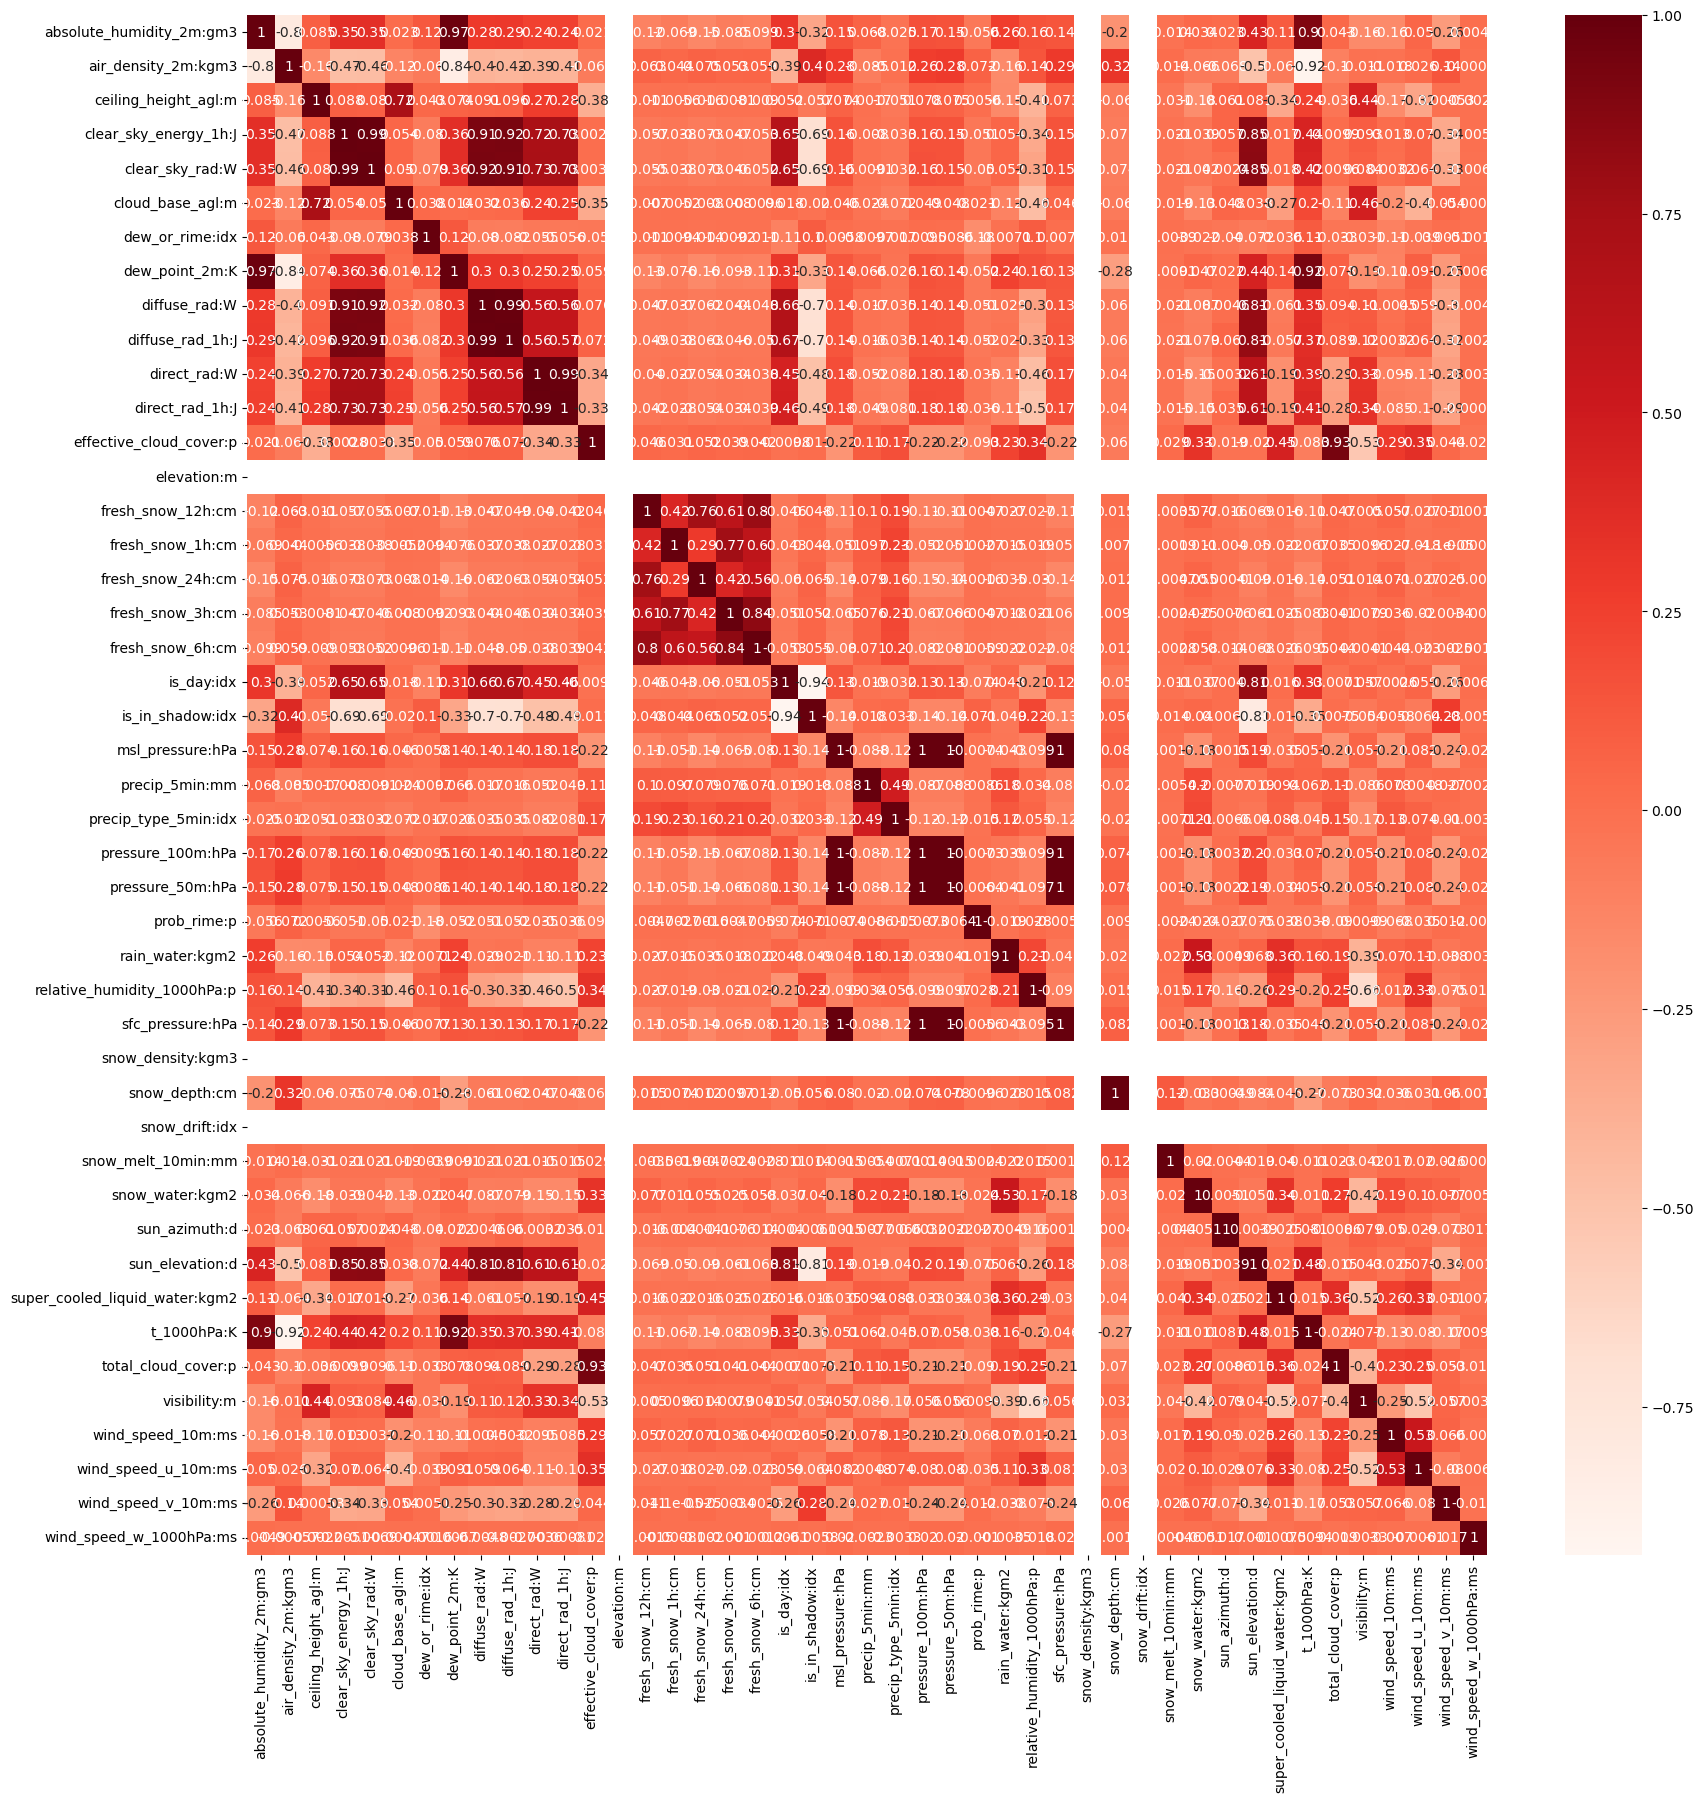

In [41]:
# Matrice de corrélation en couleurs
import seaborn as sns

corr = X_train_observed_a.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

In [42]:
# Décrire le nombre de ligne des train et test
print('X_train_estimated_a', X_train_estimated_a.shape)
print('X_train_estimated_b', X_train_estimated_b.shape)
print('X_train_estimated_c', X_train_estimated_c.shape)
print('X_train_observed_a', X_train_observed_a.shape)
print('X_train_observed_b', X_train_observed_b.shape)
print('X_train_observed_c', X_train_observed_c.shape)
print('X_test_estimated_a', X_test_estimated_a.shape)
print('X_test_estimated_b', X_test_estimated_b.shape)
print('X_test_estimated_c', X_test_estimated_c.shape)


X_train_estimated_a (17576, 47)
X_train_estimated_b (17576, 47)
X_train_estimated_c (17576, 47)
X_train_observed_a (118669, 46)
X_train_observed_b (116929, 46)
X_train_observed_c (116825, 46)
X_test_estimated_a (2880, 47)
X_test_estimated_b (2880, 47)
X_test_estimated_c (2880, 47)


In [43]:
# Affiche les colonnes de observation et estimated
print('X_train_observed_a', X_train_observed_a.columns)
print('X_train_estimated_a', X_train_estimated_a.columns)

X_train_observed_a Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wi

In [44]:
# Récupère mes données de X_train_estimated_a tel que la colonne date_forecast la même que dans X_train_observed_a
X_diff_a = X_train_estimated_a[X_train_estimated_a['date_forecast'].isin(X_train_observed_a['date_forecast'])]

# Affiche les résultats
print('X_diff_a', X_diff_a.shape)

# Affiche 

X_diff_a (0, 47)


In [49]:
# Afficher le début de la colonne date_forecast de X_train_estimated_a
print('X_train_estimated_a', X_train_estimated_a['date_forecast'].head())
print('X_train_estimated_a', X_train_estimated_a['date_forecast'].tail())

#Afficher la fin de la colonne date_forecast de X_train_observed_a
print('X_train_observed_a', X_train_observed_a['date_forecast'].head())
print('X_train_observed_a', X_train_observed_a['date_forecast'].tail())

print('X_test_estimated_a', X_test_estimated_a['date_forecast'].head())
print('X_test_estimated_a', X_test_estimated_a['date_forecast'].tail())

X_train_estimated_a 0   2022-10-28 22:00:00
1   2022-10-28 22:15:00
2   2022-10-28 22:30:00
3   2022-10-28 22:45:00
4   2022-10-28 23:00:00
Name: date_forecast, dtype: datetime64[ns]
X_train_estimated_a 17571   2023-04-30 22:45:00
17572   2023-04-30 23:00:00
17573   2023-04-30 23:15:00
17574   2023-04-30 23:30:00
17575   2023-04-30 23:45:00
Name: date_forecast, dtype: datetime64[ns]
X_train_observed_a 0   2019-06-02 22:00:00
1   2019-06-02 22:15:00
2   2019-06-02 22:30:00
3   2019-06-02 22:45:00
4   2019-06-02 23:00:00
Name: date_forecast, dtype: datetime64[ns]
X_train_observed_a 118664   2022-10-21 00:00:00
118665   2022-10-21 00:15:00
118666   2022-10-21 00:30:00
118667   2022-10-21 00:45:00
118668   2022-10-21 01:00:00
Name: date_forecast, dtype: datetime64[ns]
X_test_estimated_a 0   2023-05-01 00:00:00
1   2023-05-01 00:15:00
2   2023-05-01 00:30:00
3   2023-05-01 00:45:00
4   2023-05-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
X_test_estimated_a 2875   2023-07-03 22:45: